In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px
import warnings
warnings.filterwarnings(action="ignore")

Часть 3. Задача кластеризации

Датасет: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Для представленного датасета необходимо решить задачу кластеризации методом
k-средних. При решении задачи необходимо ответить на следующие вопросы:

1. Как выбор начальных центров кластеров влияет на результат кластеризации

2. Какую метрику выбрать для оценки качества кластеризации?

CUST_ID : Идентификация держателя кредитной карты (Категориальный)
BALANCE : Остаток средств на счете для совершения покупок
BALANCE_FREQUENCY : Как часто обновляется баланс, оценка между 0 и 1 (1 = частое обновление, 0 = редкое обновление)
PURCHASES : Сумма покупок, сделанных с аккаунта
ONEOFF_PURCHASES : Максимальная сумма покупки за один раз
INSTALLMENTS_PURCHASES : Сумма покупки в рассрочку
CASH_ADVANCE : Займ наличными, предоставленный пользователю
PURCHASES_FREQUENCY : Как часто совершаются покупки, оценка между 0 и 1 (1 = частые покупки, 0 = редкие покупки)
ONEOFFPURCHASESFREQUENCY : Как часто совершаются покупки за один раз (1 = частые покупки, 0 = редкие покупки)
PURCHASESINSTALLMENTSFREQUENCY : Как часто совершаются покупки в рассрочку (1 = часто, 0 = нечасто)
CASHADVANCEFREQUENCY : Как часто происходит выдача наличных вперед
CASHADVANCETRX : Количество транзакций с "наличными вперед"
PURCHASES_TRX : Количество транзакций по покупкам
CREDIT_LIMIT : Кредитный лимит пользователя
PAYMENTS : Сумма платежей, сделанных пользователем
MINIMUM_PAYMENTS : Минимальная сумма платежей, сделанных пользователем
PRCFULLPAYMENT : Процент полной оплаты, произведенной пользователем
TENURE : Срок обслуживания кредитной карты для пользователя


In [2]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
df = df.drop(['CUST_ID'], axis=1)

In [6]:
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

In [7]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
SS=StandardScaler()
df[df.columns]=SS.fit_transform(df[df.columns])

Для определения оптимального количества кластеров можно воспользоваться методом логтя или коэффициентом силуэта. Воспользуемся сразу двумя

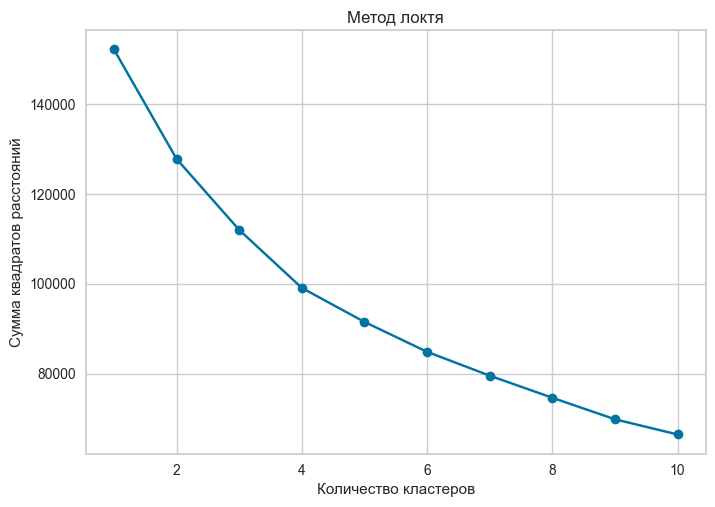

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.show()

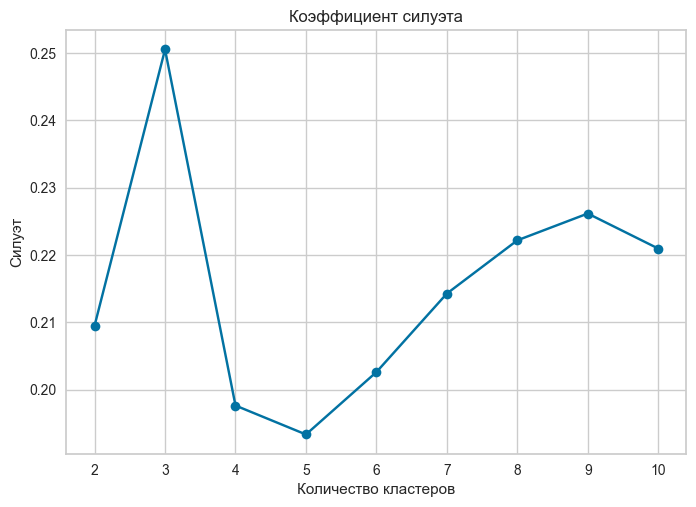

Оптимальное количество кластеров: 3


In [10]:
cluster_range = range(2, 11)

silhouette_scores = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(df)

    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Коэффициент силуэта')
plt.xlabel('Количество кластеров')
plt.ylabel('Силуэт')
plt.show()

optimal_num_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f"Оптимальное количество кластеров: {optimal_num_clusters}")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


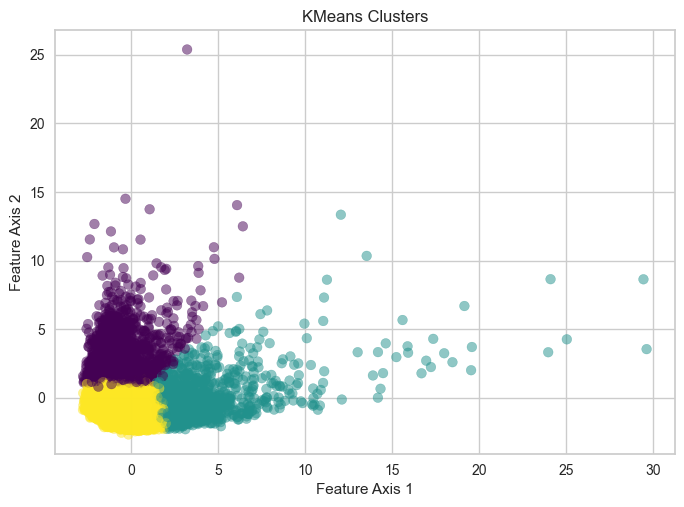

In [11]:
from sklearn.decomposition import PCA

opt_model = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels = opt_model.fit_predict(df)

pca = PCA(n_components=2)
feature_axes = pca.fit_transform(df)

plt.figure()
plt.scatter(feature_axes[:, 0], feature_axes[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title('KMeans Clusters')
plt.xlabel('Feature Axis 1')
plt.ylabel('Feature Axis 2')
plt.legend()
plt.show()

Ответ на вопрос
1. Как выбор начальных центров кластеров влияет на результат кластеризации?



Начальные центры кластеров могут быть выбраны случайно или с использованием различных эвристик. Если начальные центры кластеров выбраны плохо, то алгоритм может сойтись к локальному минимуму, который не является оптимальным. Чтобы оценить стабильность данного решения, можно сравнить результаты анализа с различными перестановками значений начальных центров.

Ответ на вопрос

2. Какую метрику выбрать для оценки качества кластеризации?

Существует множество метрик для оценки качества кластеризации, и выбор метрики зависит от целей и задач кластеризации. Некоторые из наиболее распространенных метрик включают в себя:

1. Adjusted Rand Index (ARI): Используется для измерения сходства между двумя кластеризациями. Он принимает значения от -1 до 1, где 1 означает идеальное совпадение, 0 - случайное совпадение, а -1 - полное несовпадение.

2. Silhouette Coefficient: Используется для оценки качества кластеризации, основываясь на среднем расстоянии между объектами внутри кластера и между объектами разных кластеров. Он принимает значения от -1 до 1, где 1 означает, что объекты хорошо сгруппированы, 0 - объекты находятся на границе кластеров, а -1 - объекты находятся в неправильных кластерах.

3. Davies-Bouldin Index: Используется для оценки качества кластеризации, основываясь на среднем расстоянии между центроидами кластеров и между кластерами. Чем меньше значение индекса, тем лучше кластеризация.